## '서울시 생활정보 기반 대중교통 수요 분석'
* 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다.

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

In [1]:
import sys
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
import seaborn as sns
# 시각화 한글 폰트 설정
# Windows
plt.rc('font', family='Malgun')
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='darkgrid')
# macOS
# plt.rcParams['axes.unicode_minus'] = False
# plt.rcParams['font.family'] = 'AppleGothic'
import scipy.stats as spst

import matplotlib
import scipy
display(
    sys.version,
    np.__version__,
    pd.__version__,
    matplotlib.__version__,
    sns.__version__,
    scipy.__version__
)

'3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]'

'1.24.3'

'2.0.3'

'3.7.2'

'0.12.2'

'1.11.1'

In [2]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [3]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding='cp949')
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding='cp949')
df_seoul_business = pd.read_csv('df_seoul_business.csv', sep=",", encoding='cp949')
df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding='cp949')
display(
    df_seoul_bus_station.shape,
    df_seoul_moving.shape,
    df_seoul_business.shape,
    df_seoul_people.shape
)

(25, 7)

(25, 5)

(25, 4)

(25, 4)

In [5]:
df_seoul_business.rename(columns={'커피전문점.1':'커피전문점', '기타주점업.1':'기타주점업'}, inplace=True)
df_seoul_business

,자치구,커피전문점,기타주점업,total
0,종로구,3613,1413,5026
1,중구,3542,982,4524
2,용산구,2076,1332,3408
3,성동구,1859,621,2480
4,광진구,1887,1577,3464
5,동대문구,1472,1082,2554
6,중랑구,1037,1000,2037
7,성북구,1384,1030,2414
8,강북구,1095,1275,2370
9,도봉구,837,477,1314


In [6]:
df_seoul_moving.rename(columns={'도착 시군구 코드':'자치구'},inplace=True)
df_seoul_moving

,자치구,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,종로구,60.1513,41.9113,29075578,20258827.4600
1,중구,58.4505,44.1283,28733286,21692705.4900
2,용산구,58.4947,34.2455,26487237,15506848.6800
3,성동구,58.8799,39.0013,27279447,18069555.2700
4,광진구,61.8072,42.6976,26804906,18517366.6700
5,동대문구,60.7454,37.8940,28277328,17639877.6100
6,중랑구,65.2150,38.6343,25059916,14845861.7700
7,성북구,60.9754,41.7813,27954290,19154699.5100
8,강북구,66.4868,36.2676,23924081,13050239.2100
9,도봉구,68.3655,35.4063,22060398,11425008.6100


In [7]:
df = pd.merge(standard,df_seoul_people,how='inner', on='자치구')
df = pd.merge(df,df_seoul_business,how='inner', on='자치구')
df = pd.merge(df,df_seoul_bus_station,how='inner', on='자치구')
df = pd.merge(df,df_seoul_moving,how='inner', on='자치구')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   도착 시군구 코드    25 non-null     int64  
 1   자치구          25 non-null     object 
 2   남자           25 non-null     int64  
 3   여자           25 non-null     int64  
 4   합계           25 non-null     int64  
 5   커피전문점        25 non-null     int64  
 6   기타주점업        25 non-null     int64  
 7   total        25 non-null     int64  
 8   정류장수         25 non-null     int64  
 9   노선수          25 non-null     int64  
 10  승차총승객수       25 non-null     int64  
 11  하차총승객수       25 non-null     int64  
 12  승차평균승객수      25 non-null     float64
 13  하차평균승객수      25 non-null     float64
 14  평균 이동 시간(분)  25 non-null     float64
 15  이동인구(합)      25 non-null     float64
 16  총 이동 시간      25 non-null     int64  
 17  총 이동인구       25 non-null     float64
dtypes: float64(5), int64(12), object(1)
memory usage: 3.

In [9]:
df.to_csv('df_full.csv', index=False, encoding='cp949')

In [10]:
df = pd.read_csv('./df_full.csv', encoding='cp949')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   도착 시군구 코드    25 non-null     int64  
 1   자치구          25 non-null     object 
 2   남자           25 non-null     int64  
 3   여자           25 non-null     int64  
 4   합계           25 non-null     int64  
 5   커피전문점        25 non-null     int64  
 6   기타주점업        25 non-null     int64  
 7   total        25 non-null     int64  
 8   정류장수         25 non-null     int64  
 9   노선수          25 non-null     int64  
 10  승차총승객수       25 non-null     int64  
 11  하차총승객수       25 non-null     int64  
 12  승차평균승객수      25 non-null     float64
 13  하차평균승객수      25 non-null     float64
 14  평균 이동 시간(분)  25 non-null     float64
 15  이동인구(합)      25 non-null     float64
 16  총 이동 시간      25 non-null     int64  
 17  총 이동인구       25 non-null     float64
dtypes: float64(5), int64(12), object(1)
memory usage: 3.

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 설정할 것인가?

In [11]:
columns = ['자치구','정류장수','합계','total','이동인구(합)','총 이동인구','노선수']
df1 = df[columns]

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [12]:
df1

,자치구,정류장수,합계,total,이동인구(합),총 이동인구,노선수
0,종로구,356,150453,5026,41.9113,20258827.4600,105
1,중구,173,131793,4524,44.1283,21692705.4900,102
2,용산구,326,227106,3408,34.2455,15506848.6800,69
3,성동구,432,284766,2480,39.0013,18069555.2700,58
4,광진구,274,351180,3464,42.6976,18517366.6700,43
5,동대문구,307,359873,2554,37.8940,17639877.6100,74
6,중랑구,384,387470,2037,38.6343,14845861.7700,50
7,성북구,595,438168,2414,41.7813,19154699.5100,98
8,강북구,410,292977,2370,36.2676,13050239.2100,71
9,도봉구,366,309494,1314,35.4063,11425008.6100,54


In [13]:
def eda_num(data, var, bins=30):
    # 기초통계량
    print('<< 기초통계량 >>')
    display(data[[var]].describe().T)

    # 시각화
    print('<< 그래프 >>')
    plt.figure(figsize=(10,6))

    plt.subplot(2,1,1)
    sns.histplot(data[var], bins=bins, kde=True)
    plt.grid()

    plt.subplot(2,1,2)
    sns.boxplot(x=data[var])
    plt.grid()
    plt.show()

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
정류장수,25.0000,426.0800,105.0230,173.0000,356.0000,435.0000,495.0000,601.0000


<< 그래프 >>


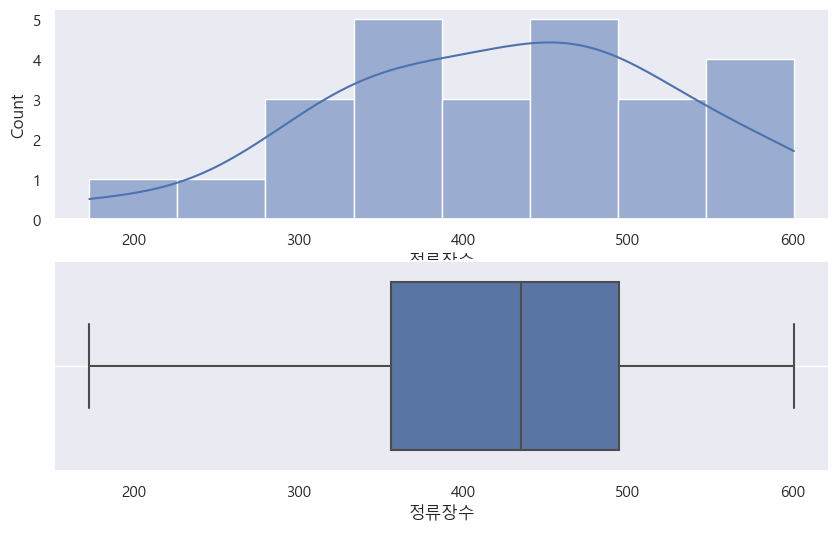

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
합계,25.0000,385551.9600,125752.1544,131793.0000,309494.0000,389714.0000,463318.0000,660025.0000


<< 그래프 >>


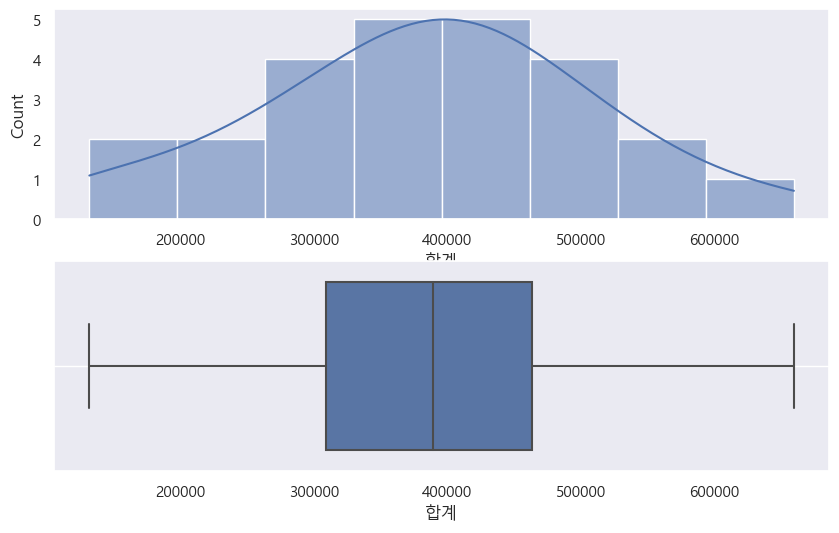

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
total,25.0000,3547.7200,1863.4161,1314.0000,2414.0000,2592.0000,4524.0000,9801.0000


<< 그래프 >>


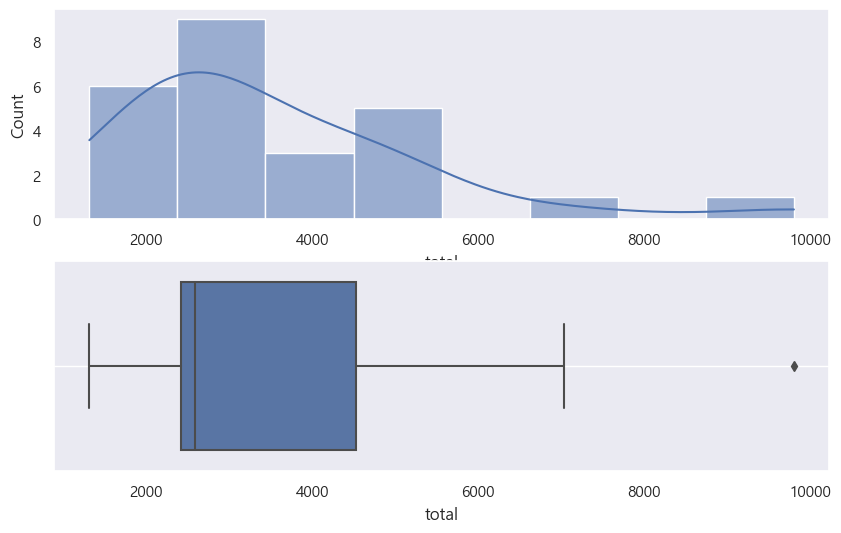

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
이동인구(합),25.0000,47.6052,13.8930,30.0765,38.8344,42.6976,51.6240,88.5899


<< 그래프 >>


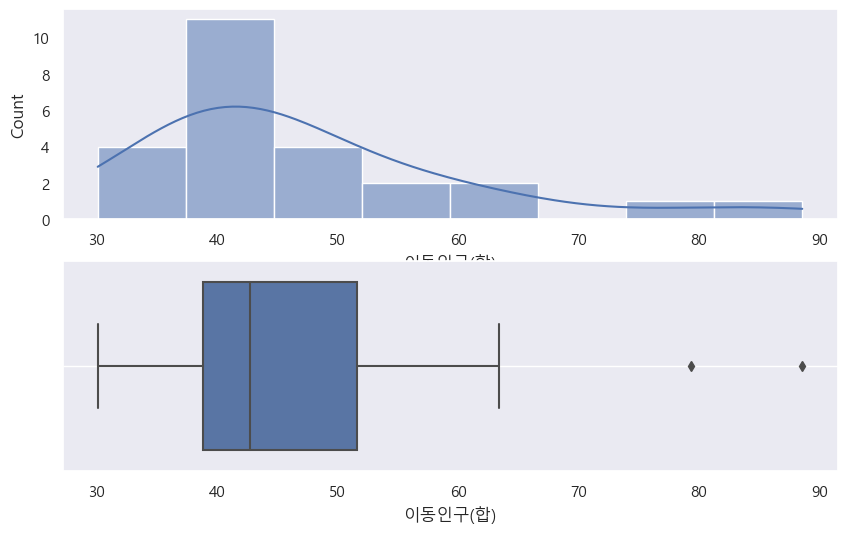

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
총 이동인구,25.0000,21009570.7536,8665312.5902,8908425.3400,16314364.4400,18517366.6700,23386329.6000,50031784.3600


<< 그래프 >>


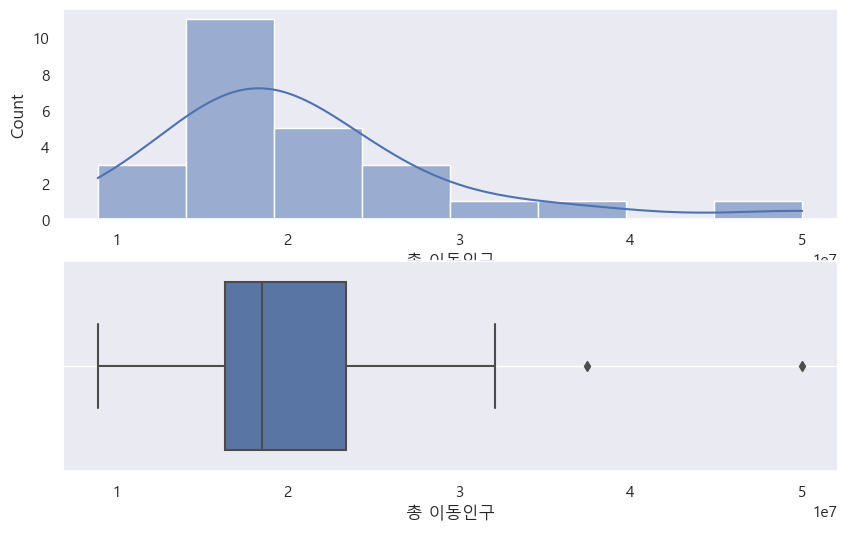

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
노선수,25.0000,74.4800,23.3312,22.0000,57.0000,74.0000,98.0000,109.0000


<< 그래프 >>


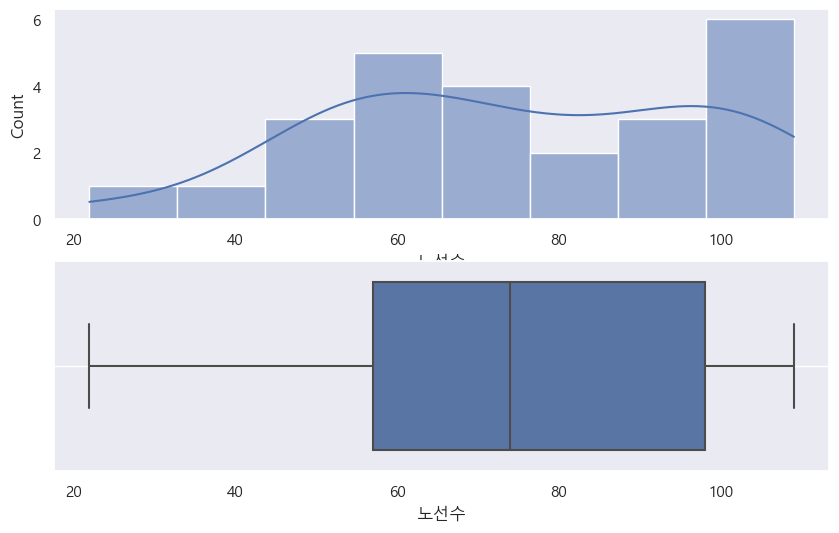

In [14]:
for col in df1.select_dtypes(include='number').columns:
    eda_num(df1,col,bins = 8)
    print('='*100)

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가

* 가설검정시 다음의 항목을 참조하여 수행
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행
    
상관계수 (경험적 기반)
- 0.5 ~ 1 : 강한
- 0.2 ~ 0.5 : 중간
- 0.1 ~ 0.2 : 약간
- 0 ~ 0.1 : 없음
- 음수 똑같음 

p-value 기준을 0.05? 5%
p-value가 0.05보다 크다 == 귀무가설을 기각 하지 못한다 == 대립가설이 틀렸다(우리가 원하는 바는 대립가설)

- 귀무가설을 기각하려면 우리가 싫어하는 귀무가설을 입증할 증거가 나올 확률이 5% 이하여야 함
- p-value가 그 귀무가설을 입증할 증거가 나올 확률을 의미함


In [15]:
def numnum(data, num1, num2, alpha=0.05):
    G = sns.jointplot(data=data, x=num1, y=num2, height=5)
    sns.regplot(data=data, x=num1, y=num2, ax=G.ax_joint, truncate=False,
                scatter_kws={"fc":"tab:blue", "ec":"tab:blue", "s":5},
                color="tab:orange", line_kws={"lw":3})
    plt.grid()
    
    tmp = data.loc[data[num1].notna() & data[num2].notna()]
    r, p = spst.pearsonr(tmp[num1], tmp[num2])
    print(f'상관계수: {r.round(6)} | p-value: {p.round(6)} | 유의수준: {alpha}')
    if p<alpha:
        if abs(r)>0.5:
            print(f'{num1} --> {num2}: 강한 {["음","양"][int(r>0)]}의 상관관계')
        elif abs(r)>0.2:
            print(f'{num1} --> {num2}: {["음","양"][int(r>0)]}의 상관관계')
        elif abs(r)>0.1:
            print(f'{num1} --> {num2}: 약한 {["음","양"][int(r>0)]}의 상관관계')
        else:
            print(f'{num1} --> {num2}: 상관관계 거의 없음')
    else:
        print(f'{num1} --> {num2}: 상관관계가 있다고 말할 수 있는 증거가 없다.(귀무가설 채택)')

### 1) 정류장수(열이름: 정류장수)과 인구수(열이름: 합계)의 상관관계 분석

상관계수: 0.608341 | p-value: 0.001253 | 유의수준: 0.05
합계 --> 정류장수: 강한 양의 상관관계


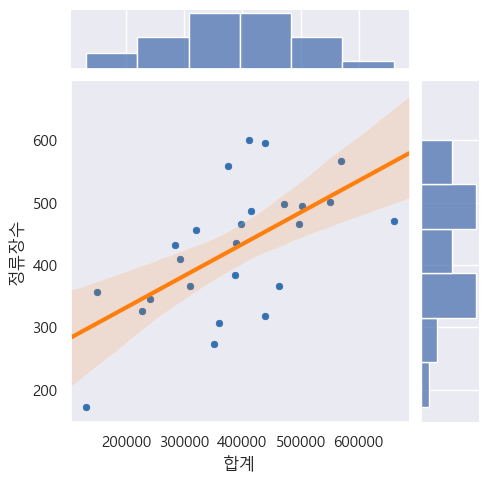

In [16]:
numnum(data = df1, num1='합계', num2='정류장수',alpha=0.05)

### 2) 업종 종사자합(열이름: total)과 이동인구수(열이름: 이동인구(합))의 상관관계 분석

상관계수: 0.751962 | p-value: 1.5e-05 | 유의수준: 0.05
total --> 이동인구(합): 강한 양의 상관관계


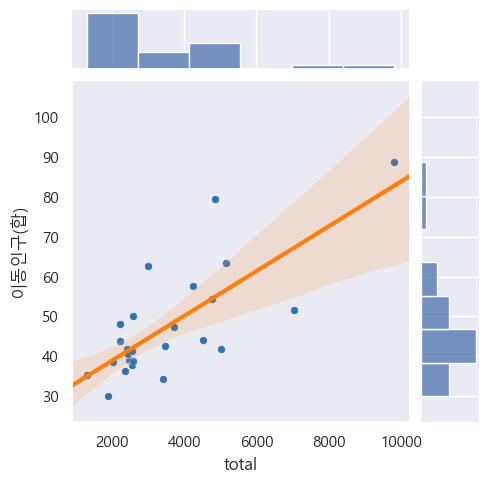

In [17]:
numnum(data=df1, num1='total', num2='이동인구(합)', alpha=0.05)

상관계수: 0.868535 | p-value: 0.0 | 유의수준: 0.05
total --> 총 이동인구: 강한 양의 상관관계


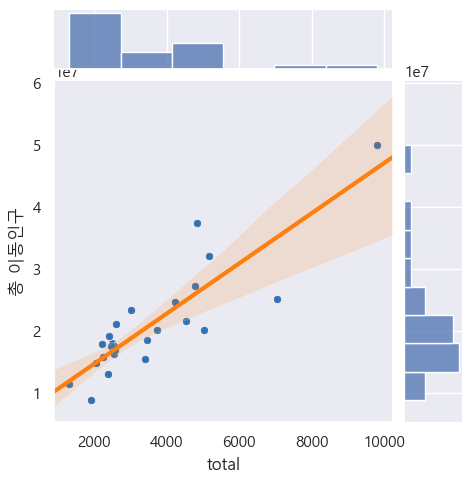

In [18]:
numnum(data=df1, num1='total', num2='총 이동인구', alpha=0.05)

### 3) 정류장수(열이름: 정류장수)와 노선수(열이름: 노선수)의 상관관계 분석

상관계수: 0.272398 | p-value: 0.187725 | 유의수준: 0.05
노선수 --> 정류장수: 상관관계가 있다고 말할 수 있는 증거가 없다.(귀무가설 채택)


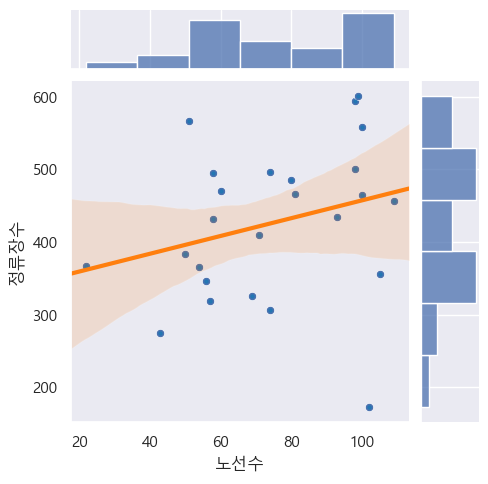

In [19]:
numnum(data=df1, num1='노선수', num2='정류장수', alpha=0.05)

### 4) 그 외 df1의 이변량 조합에 대한 상관관계 및 히트맵

c:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


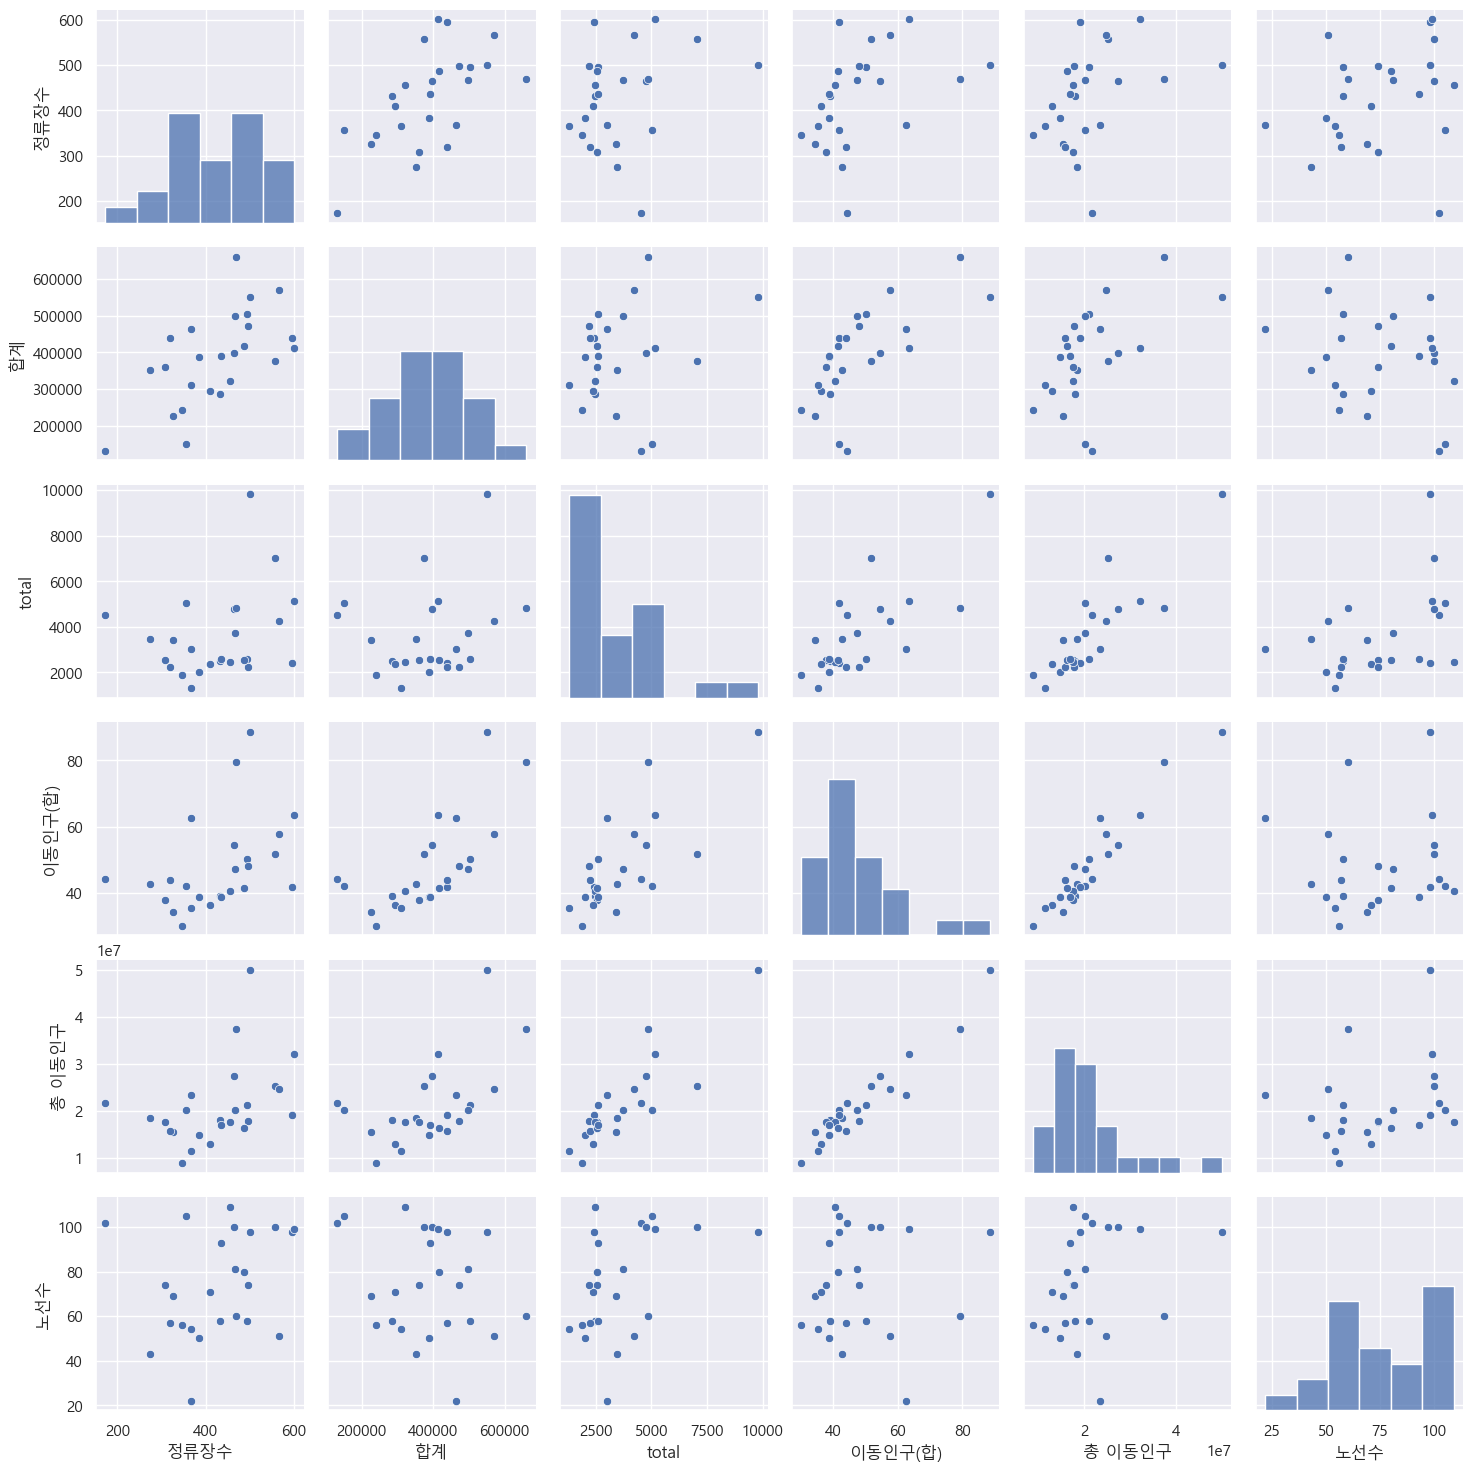

In [20]:
sns.pairplot(df1)
plt.show()

<Axes: >

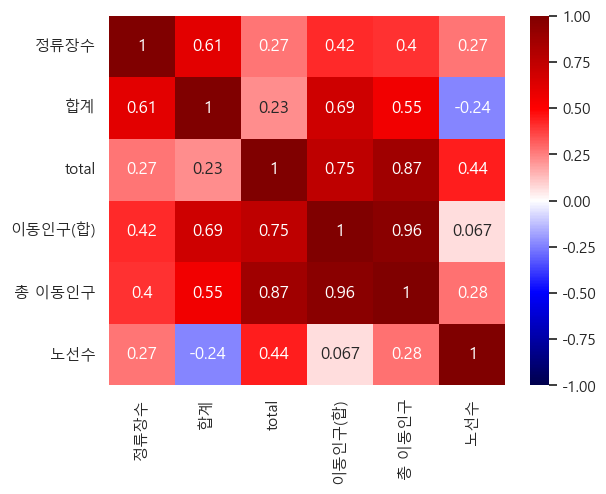

In [22]:
tmp = df1.corr(numeric_only=True)
sns.heatmap(tmp, cmap='seismic', annot=True,vmin=-1,vmax=1)

## 4.관계 정리

### 1) 강한 관계의 변수

정류장 수와 인구수는 강한 양의 상관관계, 업종 종사자 합과 이동인구는 강한 양의 상관관계

### 2) 약한 관계의 변수

정류장수와 노선수는 상관관계가 없다고 판단

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가?

'강남구' 또는 '송파구'에 설치해야 한다고 생각합니다. 내세웠던 가설 3가지를 통해 총 인원과 정류장 수는 강한 양의 상관관계이며, 업종 종사자 합과 이동인구 또한 강한 양의 상관관계 라는 것을 파악하였습니다. 이와 반대로 정류장 수와 노선수, 총 이동인구와 정류장 수는 상관관계가 없다는 것을 도출할 수 있었습니다. 또한 조사한 인사이트인 '서울 시군구별 커피숍 수'와 '서울 시 스마트 버스정류장 입지 분석'에서도 강남구와 송파구의 결과가 긍정적인 것을 확인할 수 있었습니다.